# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

<span style="color:black">A previsão de renda é útil porque permite antecipar tendências financeiras, auxiliando na tomada de decisões estratégicas para indivíduos, empresas e governos.</span>


## Etapa 2 Crisp-DM: Entendimento dos dados
<span style="color:black">Os dados foram fornecidos pela EBAC através do curso de Ciencia de dados.</span>


### Dicionário de dados

<span style="color:black">A seguir, a descrição de cada um dos dados a serem utilizados:</span>


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  DATA DO CADASTRO                                    | OBJETO|
| id_cliente              |  ID CLIENTE                                      | INTEIRO|
| sexo                    |  SEXO DO CLIENTE                                      | OBJETO|
| posse_de_veiculo        |  SE O CLIENTE POSSUI VEÍCULO                                      | BOOLEANO|
| posse_de_imovel         |  SE O CLIENTE POSSUI IMÓVEL                                      | BOOLEANO|
| qtd_filhos              |  QUANTOS FILHOS O CLIENTE POSSUI                                      | INTEIRO|
| tipo_renda              |  ORIGEM DA RENDA                                      | OBJETO|
| educacao                |  GRAU DE EDUCAÇÃO DO CLIENTE                                      | OBJETO|
| estado_civil            |  ESTADO CIVIL OFICIAL DO CLIENTE                                      | OBJETO|
| tipo_residencia         |  TIPOLOGIA DA RESIDENCIA DO CLIENTE                                      | OBJETO|
| idade                   |  IDADE                                      | INTEIRO|
| tempo_emprego           |  TEMPO DE TRABALHO EM ANOS                                      | FLOAT|
| qt_pessoas_residencia   |  QUANTAS PESSOAS ESTÃO RESIDINDO COM O CLIENTE                                      | FLOAT|
| renda                   |  RENDA TOTAL                                      | FLOAT|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from ydata_profiling import ProfileReport

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [89]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [91]:
renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [94]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [96]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [97]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas




<span style="color:BLACK">O conjunto de dados analisado contém 15.000 linhas e 14 colunas, classificadas da seguinte forma: 6 categóricas (objetos), 6 numéricas (3 inteiras e 3 decimais) e 2 booleanas. 
Temos um percentual de dados ausentes de 1,2%, relativamente baixo, favorecendo uma análise mais acurada. 
Para melhor visualização do dataset, as colunas "data_ref", "id_cliente" e "Unnamed: 0" serão removidas, pois não são relevantes para o sistema.</span>


## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [101]:
# Remover as colunas desnecessárias
renda = renda.drop(columns=['Unnamed: 0', 'data_ref', 'id_cliente'])

In [102]:
# Verificar o resultado
renda.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [107]:
print(renda.isnull().sum())

sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64


In [109]:
renda['tempo_emprego'] = renda['tempo_emprego'].fillna(renda['tempo_emprego'].mean())

In [111]:
print(renda.isnull().sum())

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64


In [113]:
print(renda.duplicated().sum())

4553


In [115]:
renda = renda.drop_duplicates()

In [117]:
print(renda.duplicated().sum())

0


In [119]:
renda = pd.get_dummies(renda, columns=['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)

In [121]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10447 entries, 0 to 14999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               10447 non-null  bool   
 1   posse_de_imovel                10447 non-null  bool   
 2   qtd_filhos                     10447 non-null  int64  
 3   idade                          10447 non-null  int64  
 4   tempo_emprego                  10447 non-null  float64
 5   qt_pessoas_residencia          10447 non-null  float64
 6   renda                          10447 non-null  float64
 7   sexo_M                         10447 non-null  bool   
 8   tipo_renda_Bolsista            10447 non-null  bool   
 9   tipo_renda_Empresário          10447 non-null  bool   
 10  tipo_renda_Pensionista         10447 non-null  bool   
 11  tipo_renda_Servidor público    10447 non-null  bool   
 12  educacao_Pós graduação         10447 non-null  bool

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


<span style="color:black">A técnica de modelagem escolhida será a de regressão linear</span>


### Rodando o modelo


In [126]:
# Separando as variáveis independentes (X) da variável dependente (y)
X = renda.drop('renda', axis=1)  
y = renda['renda']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [128]:
# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo
model.fit(X_train, y_train)

LinearRegression()

## Etapa 5 Crisp-DM: Avaliação dos resultados


<span style="color:black">Verifícasse que a principal varíavel que afeta positivamente a renda do cliente é se ele seria do sexo mascuino (coef:5.813), seguido de ter pós graduação(coef:1.230) e logo depois ser empresário e idade (coef: 846 e 858). Como variável negativa, destacam-se: Ser pensionista (1.448), ser solteiro (1.064), residência comunitária (990) e ser separado (988).</span>


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [133]:
# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Calcular o erro quadrático médio (MSE) e R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R²: {r2}')

Mean Squared Error: 52204263.68794581
R²: 0.25665444732722775


In [135]:
# Exibir os coeficientes e a interceptação
print("Coeficientes: ", model.coef_)
print("Interceptação: ", model.intercept_)

Coeficientes:  [  381.4107625    329.46983203   858.27165189    39.56658596
   551.38693784  -721.19520076  5813.73508759  -804.59906851
   846.48222    -1448.85264581   -70.32350366  1230.91519672
   134.87981689   504.98581306  -549.18704073  -988.93868327
 -1064.65317955  -344.13416306  -848.7379161   -457.12060152
  -439.04706373  -990.64474941    80.84494607   209.66008801]
Interceptação:  -928.1828615308123


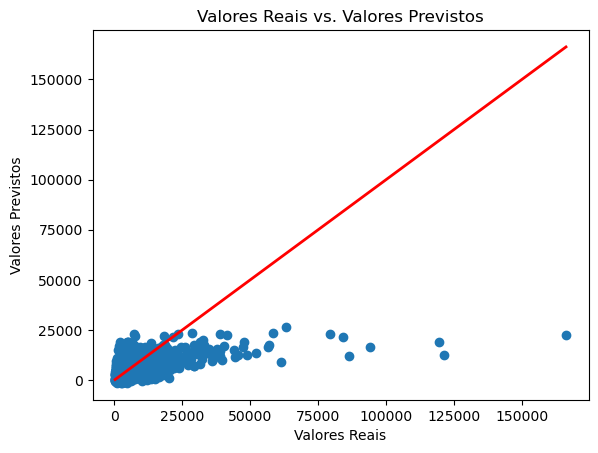

In [137]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Valores Previstos')
plt.show()